In [3]:
#!/usr/bin/env python

import click
import numpy as np
import gym
from sklearn.linear_model import LinearRegression
def include_bias(a):
    o = np.zeros(3)
    o[0]=1
    o[1]=a[0]
    o[2]=a[1]
    return o
def chakra_get_action(theta, ob, rng=np.random):
    ob_1 = include_bias(ob)
    mean = theta.dot(ob_1)
#     print("Mean is",mean)
#     return mean
    action = rng.normal(loc=mean, scale=1.)
    if(np.linalg.norm(action)>0.025):
        action= (action/np.linalg.norm(action))*0.025
    return action
def traject_episode(env,theta,rng,get_action,trunc):
    done = False
    ob = env.reset()
    print(ob)
    rewards = []
    ep_list = []
    steps=0
    while not done:
        Trans = []
        Trans.append(ob)
#         print("State is",ob)
        action = get_action(theta, ob, rng=rng)
#         print("Action is",action)
        Trans.append(action)
#         a = np.zeros(2)
#         a[0]=round(action[0],2)
#         a[1]=round(action[1],2)
#             print("Action is",a)
        next_ob, rew, done, r = env.step(action)
#         while not r:
#             action = get_action(theta, ob, rng=rng)
#             next_ob, rew, done, r = env.step(action)
        a = np.zeros(2)
        a[0]=rew
        a[1]=0
        Trans.append(a)
        ep_list.append(Trans)
#         print("next ob is",a)
        ob = next_ob
        steps+=1
        rewards.append(rew)
#         if steps >=env._max_episode_steps and trunc:
# #             print("----------------------------")
#             print(env.reward(ob))
#             break
#         env.render("human")
        if done:
            print("----------------------------")
        
    return ep_list,rewards
def deriv_log(action,state,theta):
    mean = theta.dot(include_bias(state))
    L = np.zeros((2,3))
    m1 = -2*(action[0]-mean[0])
    L[0][0]=-(m1*1)
    L[0][1]=-(m1*state[0])
    L[0][2]=-(m1*state[1])
    m2 = -2*(action[1]-mean[1])
    L[1][0]=-(m2*1)
    L[1][1]=-(m2*state[0])
    L[1][2]=-(m2*state[1])
    return L
    

In [4]:
# Register the environment
rng = np.random.RandomState(42)
gamma = 0.6
alpha = 0.8
alp_decay = 0.8
import rlpa2
env = gym.make('chakra-v0')
env._max_episode_steps =40
get_action = chakra_get_action
obs_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]       
   

env.seed(42)

[42]

In [3]:
# # Register the environment
# rng = np.random.RandomState(42)
# gamma = 0.6
# alpha = 0.8
# alp_decay = 0.8
# import rlpa2
# env = gym.make('vishamC-v0')
# env._max_episode_steps =40
# get_action = chakra_get_action
# obs_dim = env.observation_space.shape[0]
# action_dim = env.action_space.shape[0]       
   

# env.seed(42)

#     # Initialize parameters
# theta = rng.normal(scale=0.01, size=(action_dim, obs_dim + 1))
# MAX_ITR = 10
# itr = 0
# reg = LinearRegression()
# while itr<=MAX_ITR:        
#     BATCH_SIZE = 60
#     n_samples = 0
#     Grads = []
#     Avg_reward = 0
#     Avg_length = 0
        
# #         new_trajec ,rewards= traject_episode(env,theta,rng,get_action)
# # #         print(rewards)
# #         L = len(new_trajec)
# #         t = L-1
# #         badvants = np.zeros(L)
# #         R = 0
# #         bX_t = []
# #         while t>=0:
# #             R += gamma*R + new_trajec[t][2][0]
# #             badvants[t]=R
# #             bX_t.append(new_trajec[t][0])
# #             t-=1
        
        
# #         reg.fit(np.asarray(bX_t),np.asarray(badvants))
#     while n_samples<BATCH_SIZE:
#         new_trajec ,rewards= traject_episode(env,theta,rng,get_action,True)
            
#         grad = np.zeros((2,3))
#         L = len(new_trajec)
#         print("Reward sum is ",np.sum(rewards),"Length is ",L)
# #             print("Avg_reward before",Avg_reward)
#         Avg_reward = (Avg_reward*n_samples + (np.sum(rewards)))/(n_samples+1)
# #             print("Avg_reward after",Avg_reward)
#         Avg_length = (Avg_length*n_samples+L)/(n_samples+1)
#         t = L-1
#         derivs = []
#         advants = np.zeros(L)
#         R = 0
#         X_t =[]
#         while t>=0:
#             R = gamma*R + new_trajec[t][2][0]
#             advants[t]=R
#             X_t.append(new_trajec[t][0])
#             t-=1
#         if itr>=0:
#             baseline = np.zeros(len(X_t))
#         else:
#             baseline=np.zeros(len(X_t))
#         for i in range(L):
#             deriv=deriv_log(new_trajec[i][1],new_trajec[i][0],theta)
#             grad+= deriv*(advants[i]-baseline[i])
# #             reg.fit(np.asarray(X_t),np.asarray(advants))
#         norm_grad = grad /(np.linalg.norm(grad)+1e-8)
# #             print(norm_grad)
#         Grads.append(norm_grad)
#         n_samples+=1
#     Gradient = np.zeros((2,3))
#     for i in range(BATCH_SIZE):
#         Gradient+=Grads[i]
#     Gradient/=BATCH_SIZE
#     print("Gradient is ",Gradient)
#     print("theta is ",theta)
#     print(alpha*Gradient)
#     theta = theta+ (alpha * Gradient)
#     print("updated theta is",theta)
#     print("itr is _________________________________ ",itr)
#     print("Average reward is _______________________",Avg_reward/10)
#     print("Average length is _______________________",Avg_length)
#     alpha *=alp_decay
        
#     itr+=1

In [29]:
theta = np.asarray([[ 0.00141591,-0.12874328, 0.002203133],
 [ 0.00492585, 0.001381682,-0.1120944 ]])
theta = np.asarray([[0,-1,0],[0,0,-1]])
theta = np.asarray([[ 0.01873827,-0.06894621,0.00252502],
 [ 0.00585081, 0.00459651,-0.06823026]])
theta = np.asarray([[-0.01648625,-0.03126485,0.00970046],
 [ 0.01229295 ,0.01042034,-0.02033531]])
theta = np.asarray([[ 0.00605487,-0.09148143 ,0.00088738],
 [ 0.003524558,-0.00728878,-0.09467827]])
theta = np.asarray([[ 0.00535943,-0.09147205,0.004744  ],
 [ 0.03794327,-0.00254701,-0.10536604]])
theta = np.asarray([[ 0.01355154,-0.05752073,0.00297121],
 [ 0.00716698,-0.0114254,-0.07584923]])
theta = np.asarray([[ 0.56703503 ,-0.03239178 , 0.17625864],
 [ 1.72245878, -0.08008687 ,0.2511923 ]])
#chakra
# theta = np.asarray(  [[ 0.0020766 , -0.09662299 , 0.00191749],
#  [ 0.03585737 ,-0.00038709 ,-0.11015749]])
theta = np.asarray([[-0.00142905 ,-0.09721378,0.00465532],
 [-0.0399178, 0.0057936,-0.12985761]])
theta = np.asarray([[-0.02983543, -0.18442292 ,-0.02056951],
 [-0.01771948, -0.01617819 ,-0.17308316]]
)
theta = np.asarray([[-0.02293515, -0.17530576,-0.01832213],
 [-0.03258577, -0.01342971 ,-0.17638212]]
)
theta = np.asarray([[-0.00245225, -0.11313952 ,-0.00466836],
 [-0.03995343 ,-0.00895145, -0.14198205]])#0.8 0.1
theta = np.asarray([[-0.03176943 ,-0.18035568 ,-0.01252183],
 [-0.01992759,-0.01345898,-0.18451819]])#0.6 0.1
# theta = np.asarray(  [[ 0.00499998 ,-0.16247235 , 0.0003185 ],
#  [ 0.00474895 ,-0.00057273, -0.15912097]]#0.6 0.05
# )

#vishamC
# theta = np.asarray( [[ 0.00273213, -0.03145173 , 0.00017946],
#  [ 0.03119459 ,-0.00074351 ,-0.11784472]])
# theta = np.asarray([[-1.29141104e-04 ,-3.11244305e-02,8.82477391e-04],
#  [-4.87432073e-02 ,-2.65023670e-04, -1.44056210e-01]])
# theta = np.asarray(  [[-0.00156488 ,-0.05292256 ,-0.00089788],
#  [-0.03429709, -0.0076059 , -0.19594635]]
# )
# theta = np.asarray([[-0.00361652, -0.10741304,0.00121924],
#  [ 0.01085785, -0.01348615 ,-0.20729329]])
# theta = np.asarray([[0,-1,0],[0,0,-1]])

[ 0.88668363 -0.63728834]
----------------------------
(684,)
[-0.48922117  0.80471057]
----------------------------
(1100,)


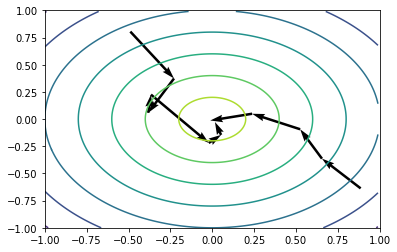

In [54]:
new_trajec ,rewards= traject_episode(env,theta,rng,get_action,False)
print(np.shape(rewards))
import matplotlib.pyplot as plt
i = 0
d = 200
a = []
b = []
while i+d in range(len(rewards)):
    plt.quiver(new_trajec[i][0][0],new_trajec[i][0][1],new_trajec[i+d][0][0]-new_trajec[i][0][0],new_trajec[i+d][0][1]-new_trajec[i][0][1], 
          angles='xy', scale_units='xy', scale = 1)
    i+=d
plt.quiver(new_trajec[i][0][0],new_trajec[i][0][1],new_trajec[len(rewards)-1][0][0]-new_trajec[i][0][0],new_trajec[len(rewards)-1][0][1]-new_trajec[i][0][1], 
          angles='xy', scale_units='xy', scale = 1)
new_trajec ,rewards= traject_episode(env,theta,rng,get_action,False)
i = 0
while i+d in range(len(rewards)):
    plt.quiver(new_trajec[i][0][0],new_trajec[i][0][1],new_trajec[i+d][0][0]-new_trajec[i][0][0],new_trajec[i+d][0][1]-new_trajec[i][0][1], 
          angles='xy', scale_units='xy', scale = 1)
    i+=d
plt.quiver(new_trajec[i][0][0],new_trajec[i][0][1],new_trajec[len(rewards)-1][0][0]-new_trajec[i][0][0],new_trajec[len(rewards)-1][0][1]-new_trajec[i][0][1], 
          angles='xy', scale_units='xy', scale = 1)
plt.xlim(-1,1)
plt.ylim(-1,1)
x = np.arange(-1.0, 1.0, 0.01)
y = np.arange(-1.0, 1.0, 0.01)
X, Y = np.meshgrid(x, y)
plt.contour(X,Y,Z)
Z = -np.sqrt(X*X+Y*Y)
print(np.shape(rewards))

[0.78426458 0.82467585]
----------------------------
(2500,)
[-0.86513206  0.78676143]
----------------------------
(4406,)


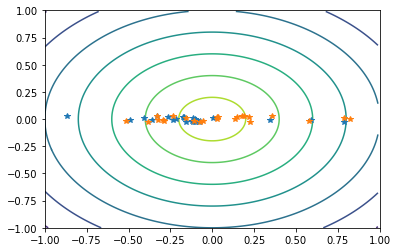

In [62]:
new_trajec ,rewards= traject_episode(env,theta,rng,get_action,False)
print(np.shape(rewards))
import matplotlib.pyplot as plt
i = 0
d = 300
a = []
b = []
while i in range(len(rewards)):
    a.append(new_trajec[i][0])
    b.append(new_trajec[i][1])
    i+=d
new_trajec,rewards= traject_episode(env,theta,rng,get_action,False)
i = 0
while i in range(len(rewards)):
    a.append(new_trajec[i][0])
    b.append(new_trajec[i][1])
    i+=d
plt.plot(a,b,"*")
plt.xlim(-1,1)
plt.ylim(-1,1)
x = np.arange(-1.0, 1.0, 0.01)
y = np.arange(-1.0, 1.0, 0.01)
X, Y = np.meshgrid(x, y)
plt.contour(X,Y,Z)
Z = -np.sqrt(X*X+Y*Y)
print(np.shape(rewards))

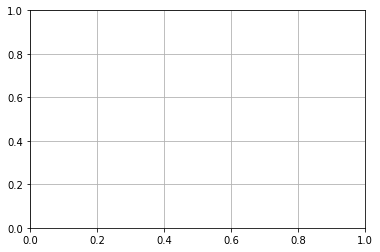

In [11]:

plt.grid()

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=2)
X = []
vector=[]
gamma = 0.6
for i in range(50):
    new_trajec ,rewards= traject_episode(env,theta,rng,get_action,False)
    #Edit: added second square bracket above to fix the ValueError problem
    L = len(rewards)
    t = L-1
    badvants = np.zeros(L)
    R = 0
    while t>=0:
        R = gamma*R + new_trajec[t][2][0]
        badvants[t]=R
        vector.append(R)
        X.append(new_trajec[t][0])
        t-=1
X_ = poly.fit_transform(X)
clf = linear_model.LinearRegression()
clf.fit(X_, vector)


[-0.52692957  0.79339225]
----------------------------
[-0.70227195 -0.57833215]
----------------------------
[ 0.66811053 -0.82013857]
----------------------------
[-0.795724   -0.67114555]
----------------------------
[ 0.50814623 -0.96840692]
----------------------------
[-0.09885544 -0.98391113]
----------------------------
[ 0.90575985 -0.54268874]
----------------------------
[-0.93959845 -0.41607187]
----------------------------
[-0.52596898  0.7692233 ]
----------------------------
[-0.88474394  0.73590819]
----------------------------
[0.67534036 0.98194736]
----------------------------
[ 0.39411007 -0.95145269]
----------------------------
[0.33490886 0.99558093]
----------------------------
[-0.46223701 -0.8078437 ]
----------------------------
[0.98880656 0.63734308]
----------------------------
[-0.00725517 -0.91120284]
----------------------------
[-0.9457915  -0.95380548]
----------------------------
[-0.75898824 -0.4909749 ]
----------------------------
[-0.79688615 -0.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(X_)

[[ 1.00000000e+00  1.57205742e-02 -2.78807160e-02  2.47136453e-04
  -4.38300865e-04  7.77334327e-04]
 [ 1.00000000e+00 -3.54191573e-03 -4.38167282e-02  1.25451670e-05
   1.55195159e-04  1.91990567e-03]
 [ 1.00000000e+00 -2.50325988e-02 -5.65897678e-02  6.26631001e-04
   1.41658895e-03  3.20240182e-03]
 ...
 [ 1.00000000e+00 -5.18661151e-01 -8.15162789e-01  2.69009390e-01
   4.22793271e-01  6.64490373e-01]
 [ 1.00000000e+00 -5.36723139e-01 -8.32447597e-01  2.88071728e-01
   4.46793888e-01  6.92969002e-01]
 [ 1.00000000e+00 -5.12071882e-01 -8.36608786e-01  2.62217612e-01
   4.28403836e-01  6.99914261e-01]]


In [14]:
c = clf.coef_

In [15]:
print(c)

[ 0.          0.00029105 -0.00122162  0.03924312  0.00488331  0.03563531]


In [17]:
x = np.arange(-1.0, 1.0, 0.01)
y = np.arange(-1.0, 1.0, 0.01)
X, Y = np.meshgrid(x, y)

Z = c[0]+c[1]*X+c[2]*Y+c[3]*X*Y+c[4]*X*X+c[5]*Y*Y

In [18]:
# x_list = np.linspace(-1,1,10)
# y_list = np.linspace(-1,1,10)
# X = np.zeros((10,10))
# Y = np.zeros((10,10))
# Z = np.zeros((10,10))
# for i in range(10):
#     for j in range(10):
#         k = np.random.randint(0,9)
#         l = np.random.randint(0,9)
#         X[i][j]=x_list[k]
#         Y[i][j]=y_list[l]
#         a=np.zeros((2,2))
#         a[0]=X[i][j]
#         a[1]=Y[i][j]
# #         print(a)
#         _a = poly.fit_transform(a)
# #         print(_a)
#         Z[i][j]=clf.predict(_a)[0]

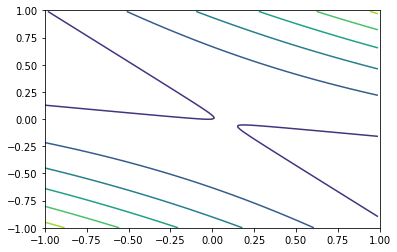

In [20]:
plt.xlim(-1,1)
plt.ylim(-1,1)
# plt.title("Value function for Global optimum theta")
plt.contour(X,Y,Z)

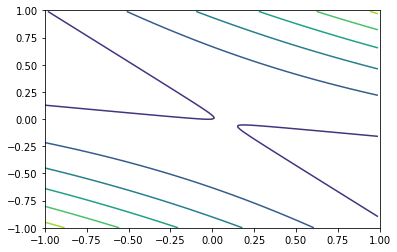

In [21]:
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.contour(X,Y,Z)

In [ ]:
plt.contour(X,Y,Z)

In [ ]:
predict_ = poly.fit_transform(predict)
print clf.predict(predict_)